# Data collection

## News articles

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from data_collection import *
import pandas as pd
from tabulate import tabulate

In [3]:
tickers = ['AAPL', 'JNJ', 'XOM']
start = '2018-01-01'
end = '2024-07-01'

# Function call to fetch news articles for the specified tickers and date range
# top_n indicates the number of top articles to fetch for each ticker
fetch_news(tickers, start, end, top_n=3)

CSV for AAPL already exists. Skipping data retrieval.
CSV for JNJ already exists. Skipping data retrieval.
CSV for XOM already exists. Skipping data retrieval.


In [4]:
# Load news data from CSV files into a dictionary keyed by stock tickers
news_data = {
    'AAPL': pd.read_csv('data/AAPL.csv'),
    'JNJ': pd.read_csv('data/JNJ.csv'),
    'XOM': pd.read_csv('data/XOM.csv')
}

# Process the news data for each ticker
for ticker in tickers:
    news_data[ticker] = process_news(news_data[ticker])

# Display the processed news data for each ticker in a formatted table
for ticker in tickers:
    table_data = news_data[ticker].tail().values.tolist()
    table_data.insert(0, news_data[ticker].columns.tolist())
    print(f'{ticker}:\n')
    print(tabulate(table_data, headers="firstrow", tablefmt="grid"))
    print('\n')

AAPL:

+--------------------------------------------------------------------------------------------------+------------+
| title                                                                                            | date       |
+==================================================================================================+============+
| 10 Best - Performing AI Stocks That Could be  Overdue  For Correction in the Second Half of 2024 | 2024-06-30 |
+--------------------------------------------------------------------------------------------------+------------+
| NVDA and FSLR lead the charge for S & P 500 Information Technology ahead of Q2 earnings          | 2024-06-30 |
+--------------------------------------------------------------------------------------------------+------------+
| AI - focused tech firms see big jump in market cap in June                                       | 2024-07-01 |
+--------------------------------------------------------------------------------

In [5]:
# Initialize a dictionary to store sentiment data for each ticker
sentiment_data = dict()

# Aggregate sentiment scores from the processed news data for each ticker
for ticker in tickers:
    sentiment_data[ticker] = aggregate_sentiment(news_data[ticker])

# Display the aggregated sentiment data in a formatted table for each ticker
for ticker in tickers:
    table_data = sentiment_data[ticker].tail().reset_index().values.tolist()
    column_names = sentiment_data[ticker].reset_index().columns.tolist()
    print(f'{ticker}:\n Shape: {sentiment_data[ticker].shape}\n')
    print(tabulate(table_data, headers=column_names, tablefmt="grid"))
    print('\n')

AAPL:
 Shape: (2369, 1)

+------------+-------------------+
| index      |   sentiment_score |
+============+===================+
| 2024-06-27 |          0.184931 |
+------------+-------------------+
| 2024-06-28 |          0.253967 |
+------------+-------------------+
| 2024-06-29 |         -0.298907 |
+------------+-------------------+
| 2024-06-30 |          0.333333 |
+------------+-------------------+
| 2024-07-01 |          0.333333 |
+------------+-------------------+


JNJ:
 Shape: (2343, 1)

+------------+-------------------+
| index      |   sentiment_score |
+============+===================+
| 2024-06-27 |        -0.333333  |
+------------+-------------------+
| 2024-06-28 |         0.293844  |
+------------+-------------------+
| 2024-06-29 |         0.332765  |
+------------+-------------------+
| 2024-06-30 |        -0.332926  |
+------------+-------------------+
| 2024-07-01 |         0.0503916 |
+------------+-------------------+


XOM:
 Shape: (2357, 1)

+------------

## Market data

In [10]:
# Load historical price data for each ticker
price_data = dict()

for ticker in tickers:
    price_data[ticker] = fetch_price(ticker, start, end)

# Display the latest price data for each ticker
for ticker in tickers:
    table_data = price_data[ticker].tail().reset_index().values.tolist()
    column_names = price_data[ticker].reset_index().columns.tolist()
    print(f'{ticker}:\n Shape: {price_data[ticker].shape}\n')
    print(tabulate(table_data, headers=column_names, tablefmt="grid"))
    print('\n')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
AAPL:
 Shape: (1633, 5)

+---------------------+--------+--------+--------+---------+----------+
| Date                |   open |   high |    low |   close |   volume |
+=====================+========+========+========+=========+==========+
| 2024-06-24 00:00:00 | 207.72 | 212.7  | 206.59 |  208.14 | 80727000 |
+---------------------+--------+--------+--------+---------+----------+
| 2024-06-25 00:00:00 | 209.15 | 211.38 | 208.61 |  209.07 | 56713900 |
+---------------------+--------+--------+--------+---------+----------+
| 2024-06-26 00:00:00 | 211.5  | 214.86 | 210.64 |  213.25 | 66213200 |
+---------------------+--------+--------+--------+---------+----------+
| 2024-06-27 00:00:00 | 214.69 | 215.74 | 212.35 |  214.1  | 49772700 |
+---------------------+--------+--------+-------

## Indicators

In [11]:
# Calculate technical indicators for each ticker
indicators_data = dict()

for ticker in tickers:
    indicators_data[ticker] = technical_indicators(price_data[ticker])

# Display the latest technical indicators for each ticker
for ticker in tickers:
    table_data = indicators_data[ticker].tail().reset_index().values.tolist()
    column_names = indicators_data[ticker].reset_index().columns.tolist()
    print(f'{ticker}:\n Shape: {indicators_data[ticker].shape}\n')
    print(tabulate(table_data, headers=column_names, tablefmt="grid"))
    print('\n')

AAPL:
 Shape: (1633, 16)

+---------------------+-------------+--------------+--------------+--------------+-------------+------------+-------------+------------+-----------+--------------+--------------+---------+---------+---------------+------------------+--------+
| Date                |     returns |   returns_10 |   returns_25 |   returns_50 |   SMA_short |   SMA_long |   EMA_short |   EMA_long |   std_dev |   upper_band |   lower_band |     RSI |    MACD |   MACD_signal |   MACD_histogram |    ATR |
+=====================+=============+==============+==============+==============+=============+============+=============+============+===========+==============+==============+=========+=========+===============+==================+========+
| 2024-06-24 00:00:00 |  0.00313265 |  0.000592441 |  0.000963655 |   0.00181169 |     201.288 |    187.474 |     202.726 |    192.57  |   9.86384 |      221.016 |      181.56  | 69.8915 | 10.1567 |       9.12853 |         1.02819  | 4.8765 |
+-

## Data Wrangling

In [12]:
# Clean and combine data from sentiment, price, and indicators for each ticker
clean_data = dict()

for ticker in tickers:
    clean_data[ticker] = wrangle_data(sentiment_data[ticker], price_data[ticker], indicators_data[ticker])

# Display the latest cleaned data for each ticker
for ticker in tickers:
    table_data = clean_data[ticker].tail().reset_index().values.tolist()
    column_names = clean_data[ticker].reset_index().columns.tolist()
    print(f'{ticker}:\n Shape: {clean_data[ticker].shape}\n')
    print(tabulate(table_data, headers=column_names, tablefmt="grid"))
    print('\n')

AAPL:
 Shape: (1580, 22)

+---------------------+-------------------+--------+--------+--------+---------+-------------+-------------+--------------+--------------+--------------+-------------+------------+-------------+------------+-----------+--------------+--------------+---------+---------+---------------+------------------+--------+
| index               |   sentiment_score |   open |   high |    low |   close |      volume |     returns |   returns_10 |   returns_25 |   returns_50 |   SMA_short |   SMA_long |   EMA_short |   EMA_long |   std_dev |   upper_band |   lower_band |     RSI |    MACD |   MACD_signal |   MACD_histogram |    ATR |
+=====================+===================+========+========+========+=========+=============+=============+==============+==============+==============+=============+============+=============+============+===========+==============+==============+=========+=========+===============+==================+========+
| 2024-06-24 00:00:00 |         

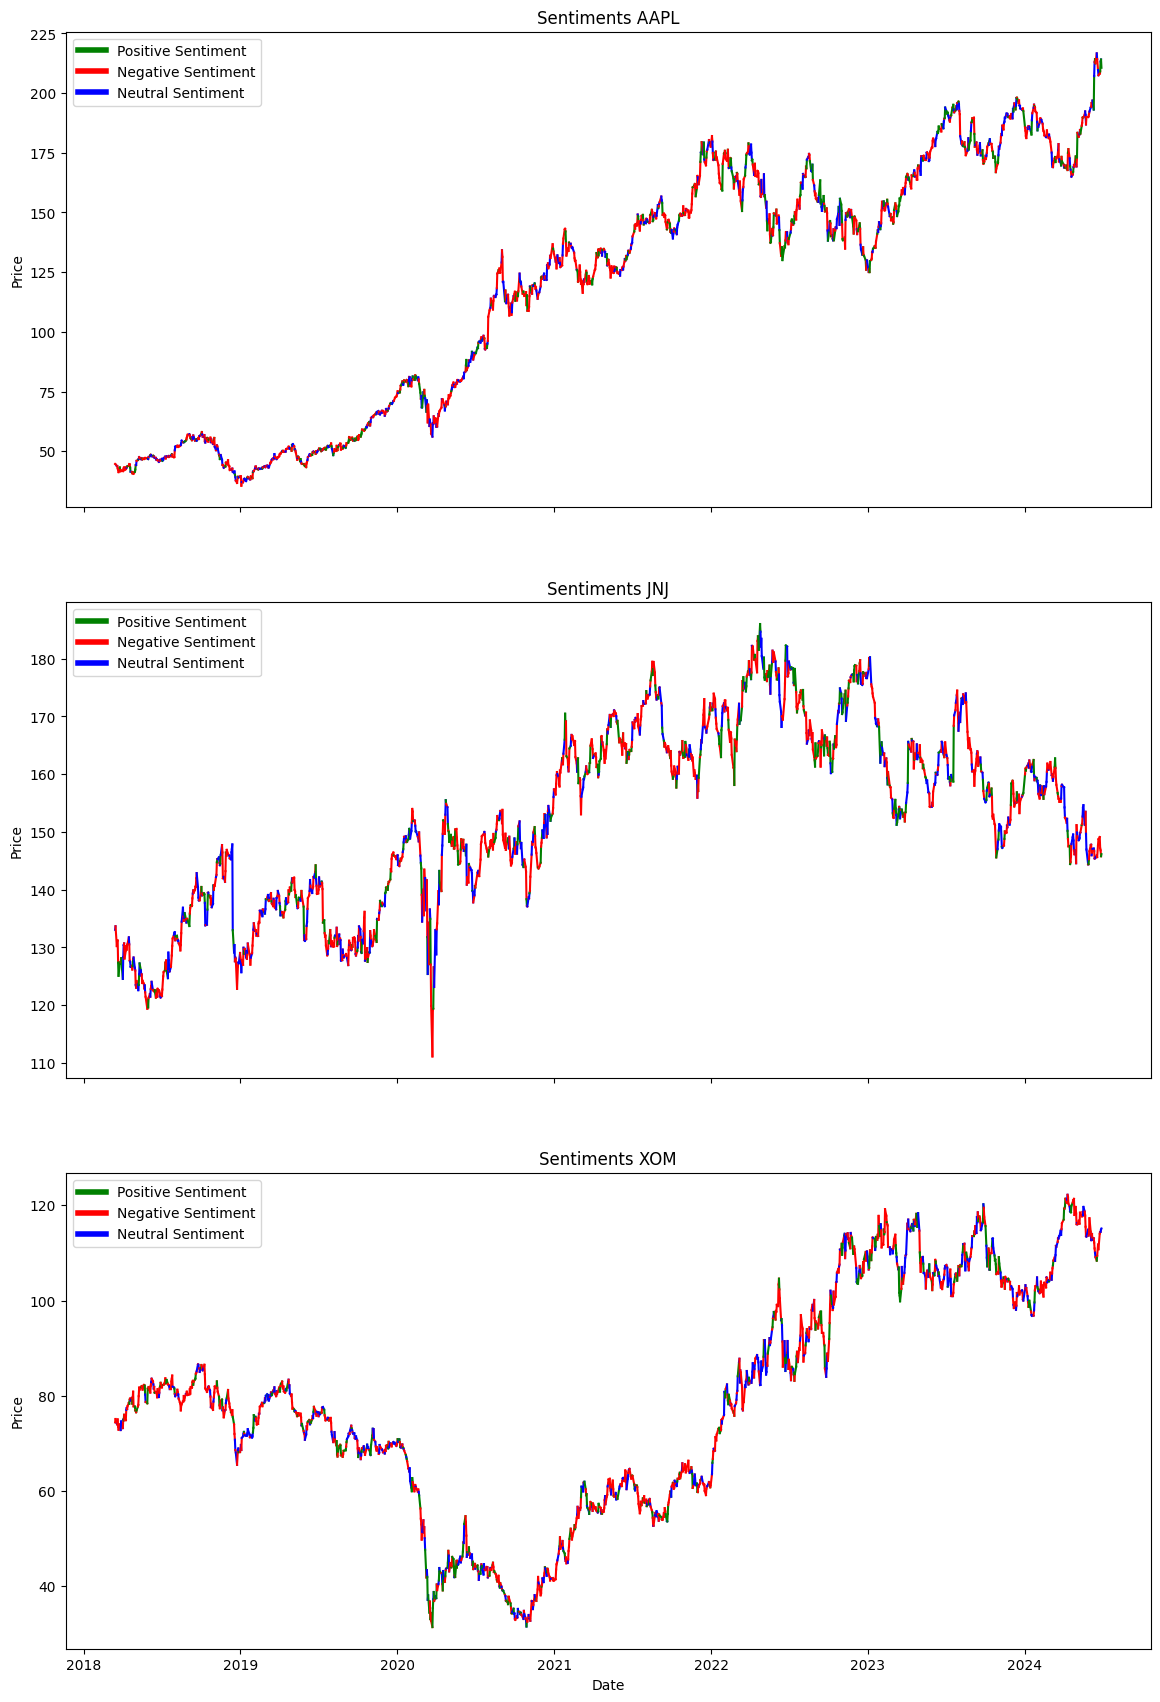

In [13]:
# Plot sentiment for the tickers using the cleaned data
plot_sentiment(tickers, clean_data)

# Regime detection

In [14]:
from regime_detection import *

In [15]:
# Identify market regimes in the cleaned data for each ticker
for ticker in tickers:
    clean_data[ticker] = identify_regimes(clean_data[ticker], mavg_diff_threshold=1.7, shift=20)

# Display the latest data with identified regimes for each ticker
for ticker in tickers:
    table_data = clean_data[ticker].tail().reset_index().values.tolist()
    column_names = clean_data[ticker].reset_index().columns.tolist()
    print(f'{ticker}:\n Shape: {clean_data[ticker].shape}\n')
    print(tabulate(table_data, headers=column_names, tablefmt="grid"))
    print('\n')

AAPL:
 Shape: (1560, 23)

+---------------------+-------------------+--------+--------+--------+---------+-------------+--------------+--------------+--------------+--------------+-------------+------------+-------------+------------+-----------+--------------+--------------+---------+---------+---------------+------------------+--------+----------+
| index               |   sentiment_score |   open |   high |    low |   close |      volume |      returns |   returns_10 |   returns_25 |   returns_50 |   SMA_short |   SMA_long |   EMA_short |   EMA_long |   std_dev |   upper_band |   lower_band |     RSI |    MACD |   MACD_signal |   MACD_histogram |    ATR |   regime |
+=====================+===================+========+========+========+=========+=============+==============+==============+==============+==============+=============+============+=============+============+===========+==============+==============+=========+=========+===============+==================+========+========

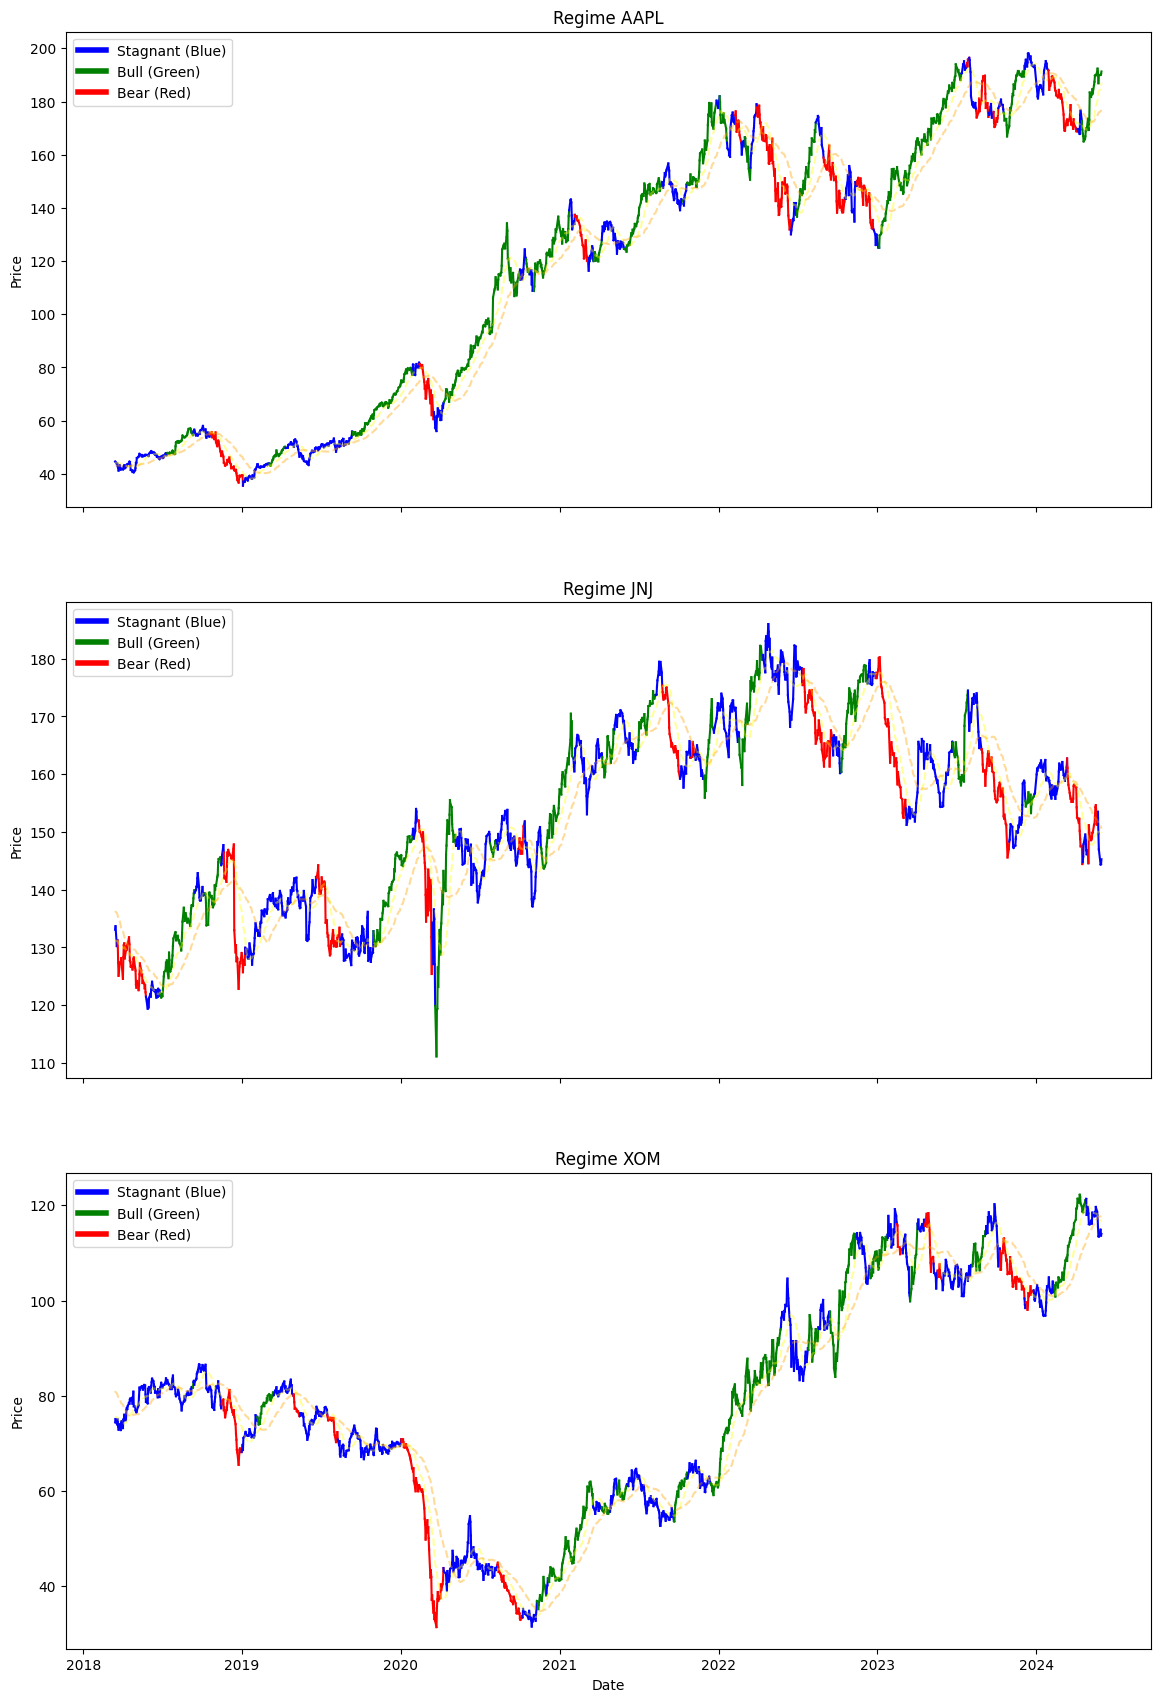

In [16]:
# Plot the identified market regimes for the tickers
plot_regimes(tickers, clean_data)

# Data preparation

## Remove multi-collinear features

In [17]:
# Remove multicollinear features from the cleaned data for each ticker
for ticker in tickers:
    clean_data[ticker] = remove_multicollinear_features(clean_data[ticker], threshold=15)

# Display the latest data with multicollinear features removed for each ticker
for ticker in tickers:
    table_data = clean_data[ticker].tail().reset_index().values.tolist()
    column_names = clean_data[ticker].reset_index().columns.tolist()
    print(f'{ticker}:\n Shape: {clean_data[ticker].shape}\n')
    print(tabulate(table_data, headers=column_names, tablefmt="grid"))
    print('\n')

Dropping SMA_short with VIF: inf
Dropping EMA_short with VIF: inf
Dropping std_dev with VIF: inf
Dropping MACD with VIF: inf
Dropping EMA_long with VIF: 186048.28688431147
Dropping high with VIF: 39703.09408991958
Dropping low with VIF: 35411.67397341547
Dropping close with VIF: 15398.289005949067
Dropping SMA_long with VIF: 6844.103778850789
Dropping open with VIF: 5559.098111519457
Dropping upper_band with VIF: 894.2465545712272
Dropping RSI with VIF: 21.421197795677173
Dropping SMA_short with VIF: inf
Dropping EMA_short with VIF: inf
Dropping std_dev with VIF: inf
Dropping MACD with VIF: inf
Dropping EMA_long with VIF: 595271.5234258332
Dropping close with VIF: 104261.18452444447
Dropping open with VIF: 57957.13421422792
Dropping high with VIF: 32160.051831431898
Dropping SMA_long with VIF: 19715.820940098263
Dropping low with VIF: 16418.410688011725
Dropping upper_band with VIF: 1511.2502727985548
Dropping RSI with VIF: 36.10777996195417
Dropping SMA_short with VIF: inf
Dropping EM

In [18]:
from sklearn.model_selection import train_test_split

# Initialize a dictionary to store train, validation, and test splits for each asset
data_dict = {}

for asset in tickers:
    df = clean_data[asset]

    # Split the data into features (X) and target (y)
    X = df.drop(columns='regime')
    y = df['regime']

    # Further split data into training, validation, and test sets
    X_train, X_val, y_train, y_val = train_test_split(
        X,
        y,
        test_size=0.2,
        shuffle=False
    )


    # Store the split data in the dictionary
    data_dict[asset] = {
        "X_train": X_train,
        "X_val": X_val,
        "y_train": y_train,
        "y_val": y_val,
    }

    # Display shapes of the split datasets
    data_shapes = [
        ["Dataset", "Shape"],
        [f"X_train_{asset}", X_train.shape],
        [f"X_val_{asset}", X_val.shape],
        [f"y_train_{asset}", y_train.shape],
        [f"y_val_{asset}", y_val.shape],
    ]

    print(f"Data shapes for {asset}:")
    print(tabulate(data_shapes, headers="firstrow", tablefmt="grid"))

Data shapes for AAPL:
+--------------+------------+
| Dataset      | Shape      |
+==============+============+
| X_train_AAPL | (1248, 10) |
+--------------+------------+
| X_val_AAPL   | (312, 10)  |
+--------------+------------+
| y_train_AAPL | (1248,)    |
+--------------+------------+
| y_val_AAPL   | (312,)     |
+--------------+------------+
Data shapes for JNJ:
+-------------+------------+
| Dataset     | Shape      |
+=============+============+
| X_train_JNJ | (1242, 10) |
+-------------+------------+
| X_val_JNJ   | (311, 10)  |
+-------------+------------+
| y_train_JNJ | (1242,)    |
+-------------+------------+
| y_val_JNJ   | (311,)     |
+-------------+------------+
Data shapes for XOM:
+-------------+------------+
| Dataset     | Shape      |
+=============+============+
| X_train_XOM | (1246, 10) |
+-------------+------------+
| X_val_XOM   | (312, 10)  |
+-------------+------------+
| y_train_XOM | (1246,)    |
+-------------+------------+
| y_val_XOM   | (312,)    

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize dictionaries to store scalers and scaled data
scalers = {}
scaled_data_dict = {}

for asset in tickers:
    # Retrieve the feature data for the asset
    X_train = data_dict[asset]["X_train"]
    X_val = data_dict[asset]["X_val"]
    
    # Create, fit, and store the MinMaxScaler
    mms = MinMaxScaler().fit(X_train)
    scalers[asset] = mms
    
    # Scale the training, validation, and test data
    X_train_scaled = mms.transform(X_train)
    X_val_scaled = mms.transform(X_val)
    
    # Store the scaled data
    scaled_data_dict[asset] = {
        "X_train_scaled": X_train_scaled,
        "X_val_scaled": X_val_scaled,
    }

# Data Augmentation

In [22]:
from data_augmentation import *
from sklearn.model_selection import ParameterSampler
import torch
from torch.utils.data import DataLoader, TensorDataset

# Initialize dictionaries to store results
gaf_data_dict = {}
tensor_data_dict = {}
data_loaders_dict = {}
best_params_dict = {}

for asset in tickers:
    # Retrieve the scaled data
    X_train_scaled = scaled_data_dict[asset]["X_train_scaled"]
    X_val_scaled = scaled_data_dict[asset]["X_val_scaled"]
    
    # Apply GAF preprocessing
    gaf_images_train = gaf_preprocess(X_train_scaled)
    gaf_images_val = gaf_preprocess(X_val_scaled, fit=False)
    
    # Store GAF images
    gaf_data_dict[asset] = {
        "gaf_images_train": gaf_images_train,
        "gaf_images_val": gaf_images_val,
    }
    
    # Convert GAF images to tensors
    tensor_train_data = torch.tensor(gaf_images_train, dtype=torch.float32).to(device)
    tensor_val_data = torch.tensor(gaf_images_val, dtype=torch.float32).to(device)
    
    # Store tensors
    tensor_data_dict[asset] = {
        "tensor_train_data": tensor_train_data,
        "tensor_val_data": tensor_val_data,
    }
    
    # Create data loaders
    train_loader = DataLoader(TensorDataset(tensor_train_data), batch_size=32, shuffle=False)
    validation_loader = DataLoader(TensorDataset(tensor_val_data), batch_size=32, shuffle=False)
    
    # Store data loaders
    data_loaders_dict[asset] = {
        "train_loader": train_loader,
        "validation_loader": validation_loader,
    }
    
    # Hyperparameter search
    param_distributions = {
        'latent_dim': [4, 8, 16],
        'learning_rate': [0.1, 0.01, 0.0001],
        'n_epochs': [10, 20, 30],
        'dropout_rate': [0.2, 0.3, 0.5, 0.7]
    }
    
    n_iter_search = 10
    param_combinations = list(ParameterSampler(param_distributions, n_iter=n_iter_search))
    
    # Initialize best parameters
    best_loss = float('inf')
    best_params = None
    
    # Evaluate each parameter combination
    for params in param_combinations:
        print(f"Testing params for {asset}: {params}")
        vae_model = CNNVAE(latent_dim=params['latent_dim']).to(device)
        optimizer = torch.optim.Adam(vae_model.parameters(), lr=params['learning_rate'])
        
        train_cvae(vae_model, train_loader, optimizer, epochs=params['n_epochs'])
        validation_loss = compute_validation_loss(vae_model, validation_loader)
        
        # Update best parameters based on validation loss
        if validation_loss < best_loss:
            best_loss = validation_loss
            best_params = params
    
    # Store the best parameters and validation loss
    best_params_dict[asset] = {
        "best_params": best_params,
        "best_loss": best_loss,
    }

    print(f"Best hyperparameters for {asset}: {best_params}, with validation loss: {best_loss}")

Testing params for AAPL: {'n_epochs': 30, 'learning_rate': 0.1, 'latent_dim': 8, 'dropout_rate': 0.2}
Testing params for AAPL: {'n_epochs': 30, 'learning_rate': 0.1, 'latent_dim': 8, 'dropout_rate': 0.7}
Testing params for AAPL: {'n_epochs': 30, 'learning_rate': 0.01, 'latent_dim': 8, 'dropout_rate': 0.5}
Testing params for AAPL: {'n_epochs': 10, 'learning_rate': 0.01, 'latent_dim': 16, 'dropout_rate': 0.5}
Testing params for AAPL: {'n_epochs': 20, 'learning_rate': 0.1, 'latent_dim': 8, 'dropout_rate': 0.3}
Testing params for AAPL: {'n_epochs': 20, 'learning_rate': 0.01, 'latent_dim': 16, 'dropout_rate': 0.5}
Testing params for AAPL: {'n_epochs': 30, 'learning_rate': 0.1, 'latent_dim': 8, 'dropout_rate': 0.5}
Testing params for AAPL: {'n_epochs': 10, 'learning_rate': 0.1, 'latent_dim': 4, 'dropout_rate': 0.7}
Testing params for AAPL: {'n_epochs': 10, 'learning_rate': 0.1, 'latent_dim': 16, 'dropout_rate': 0.3}
Testing params for AAPL: {'n_epochs': 10, 'learning_rate': 0.0001, 'latent_d

In [23]:
import os
import torch
import pickle

# Initialize dictionaries to store model and synthetic data
final_model_dict = {}
synthetic_data_dict = {}

# Define and create the directory for synthetic data
synthetic_data_dir = "synthetic_data"
os.makedirs(synthetic_data_dir, exist_ok=True)

for asset in tickers:
    best_params = best_params_dict[asset]['best_params']
    
    # Define file path for synthetic data
    synthetic_data_file = os.path.join(synthetic_data_dir, f"{asset}_synthetic_data.pkl")

    # Load existing synthetic data if available
    if os.path.exists(synthetic_data_file):
        print(f"Loading synthetic data for {asset} from {synthetic_data_file}.")
        with open(synthetic_data_file, 'rb') as f:
            synthetic_data = pickle.load(f)
    else:
        # Initialize model and optimizer with best parameters
        vae_model_best = CNNVAE(latent_dim=best_params['latent_dim']).to(device)
        optimizer_best = optim.Adam(vae_model_best.parameters(), lr=best_params['learning_rate'])

        # Prepare training data
        timestamps = data_dict[asset]["X_train"].index.values
        gaf_images_train = gaf_data_dict[asset]["gaf_images_train"]
        gaf_windows = create_sliding_windows(gaf_images_train, timestamps, window_size=7)
        tensor_train_data = torch.tensor(gaf_windows, dtype=torch.float32).to(device)

        # Store the model and training data
        final_model_dict[asset] = {
            "vae_model_best": vae_model_best,
            "optimizer_best": optimizer_best,
            "tensor_train_data": tensor_train_data,
        }

        def process_window(data, best_params):
            model = torch.nn.DataParallel(CNNVAE(latent_dim=best_params['latent_dim']).to(device))
            optimizer_best = optim.Adam(model.parameters(), lr=best_params['learning_rate'])
            train_loader = DataLoader(TensorDataset(data), shuffle=False)
            train_cvae(model, train_loader, optimizer_best, epochs=best_params['n_epochs'])
            n_synthetic_samples = 3
            return generate_synthetic_data(model, n_synthetic_samples)

        # Generate and save synthetic data
        synthetic_data = [process_window(data, best_params) for data in tensor_train_data]
        with open(synthetic_data_file, 'wb') as f:
            pickle.dump(synthetic_data, f)

        print(f"Synthetic data generated and saved for {asset}.")

    # Store synthetic data in the dictionary
    synthetic_data_dict[asset] = synthetic_data

Loading synthetic data for AAPL from synthetic_data\AAPL_synthetic_data.pkl.
Loading synthetic data for JNJ from synthetic_data\JNJ_synthetic_data.pkl.
Loading synthetic data for XOM from synthetic_data\XOM_synthetic_data.pkl.


Synthetic data shape for AAPL: (3726, 1, 10, 10)
Synthetic data shape for JNJ: (3708, 1, 10, 10)
Synthetic data shape for XOM: (3720, 1, 10, 10)


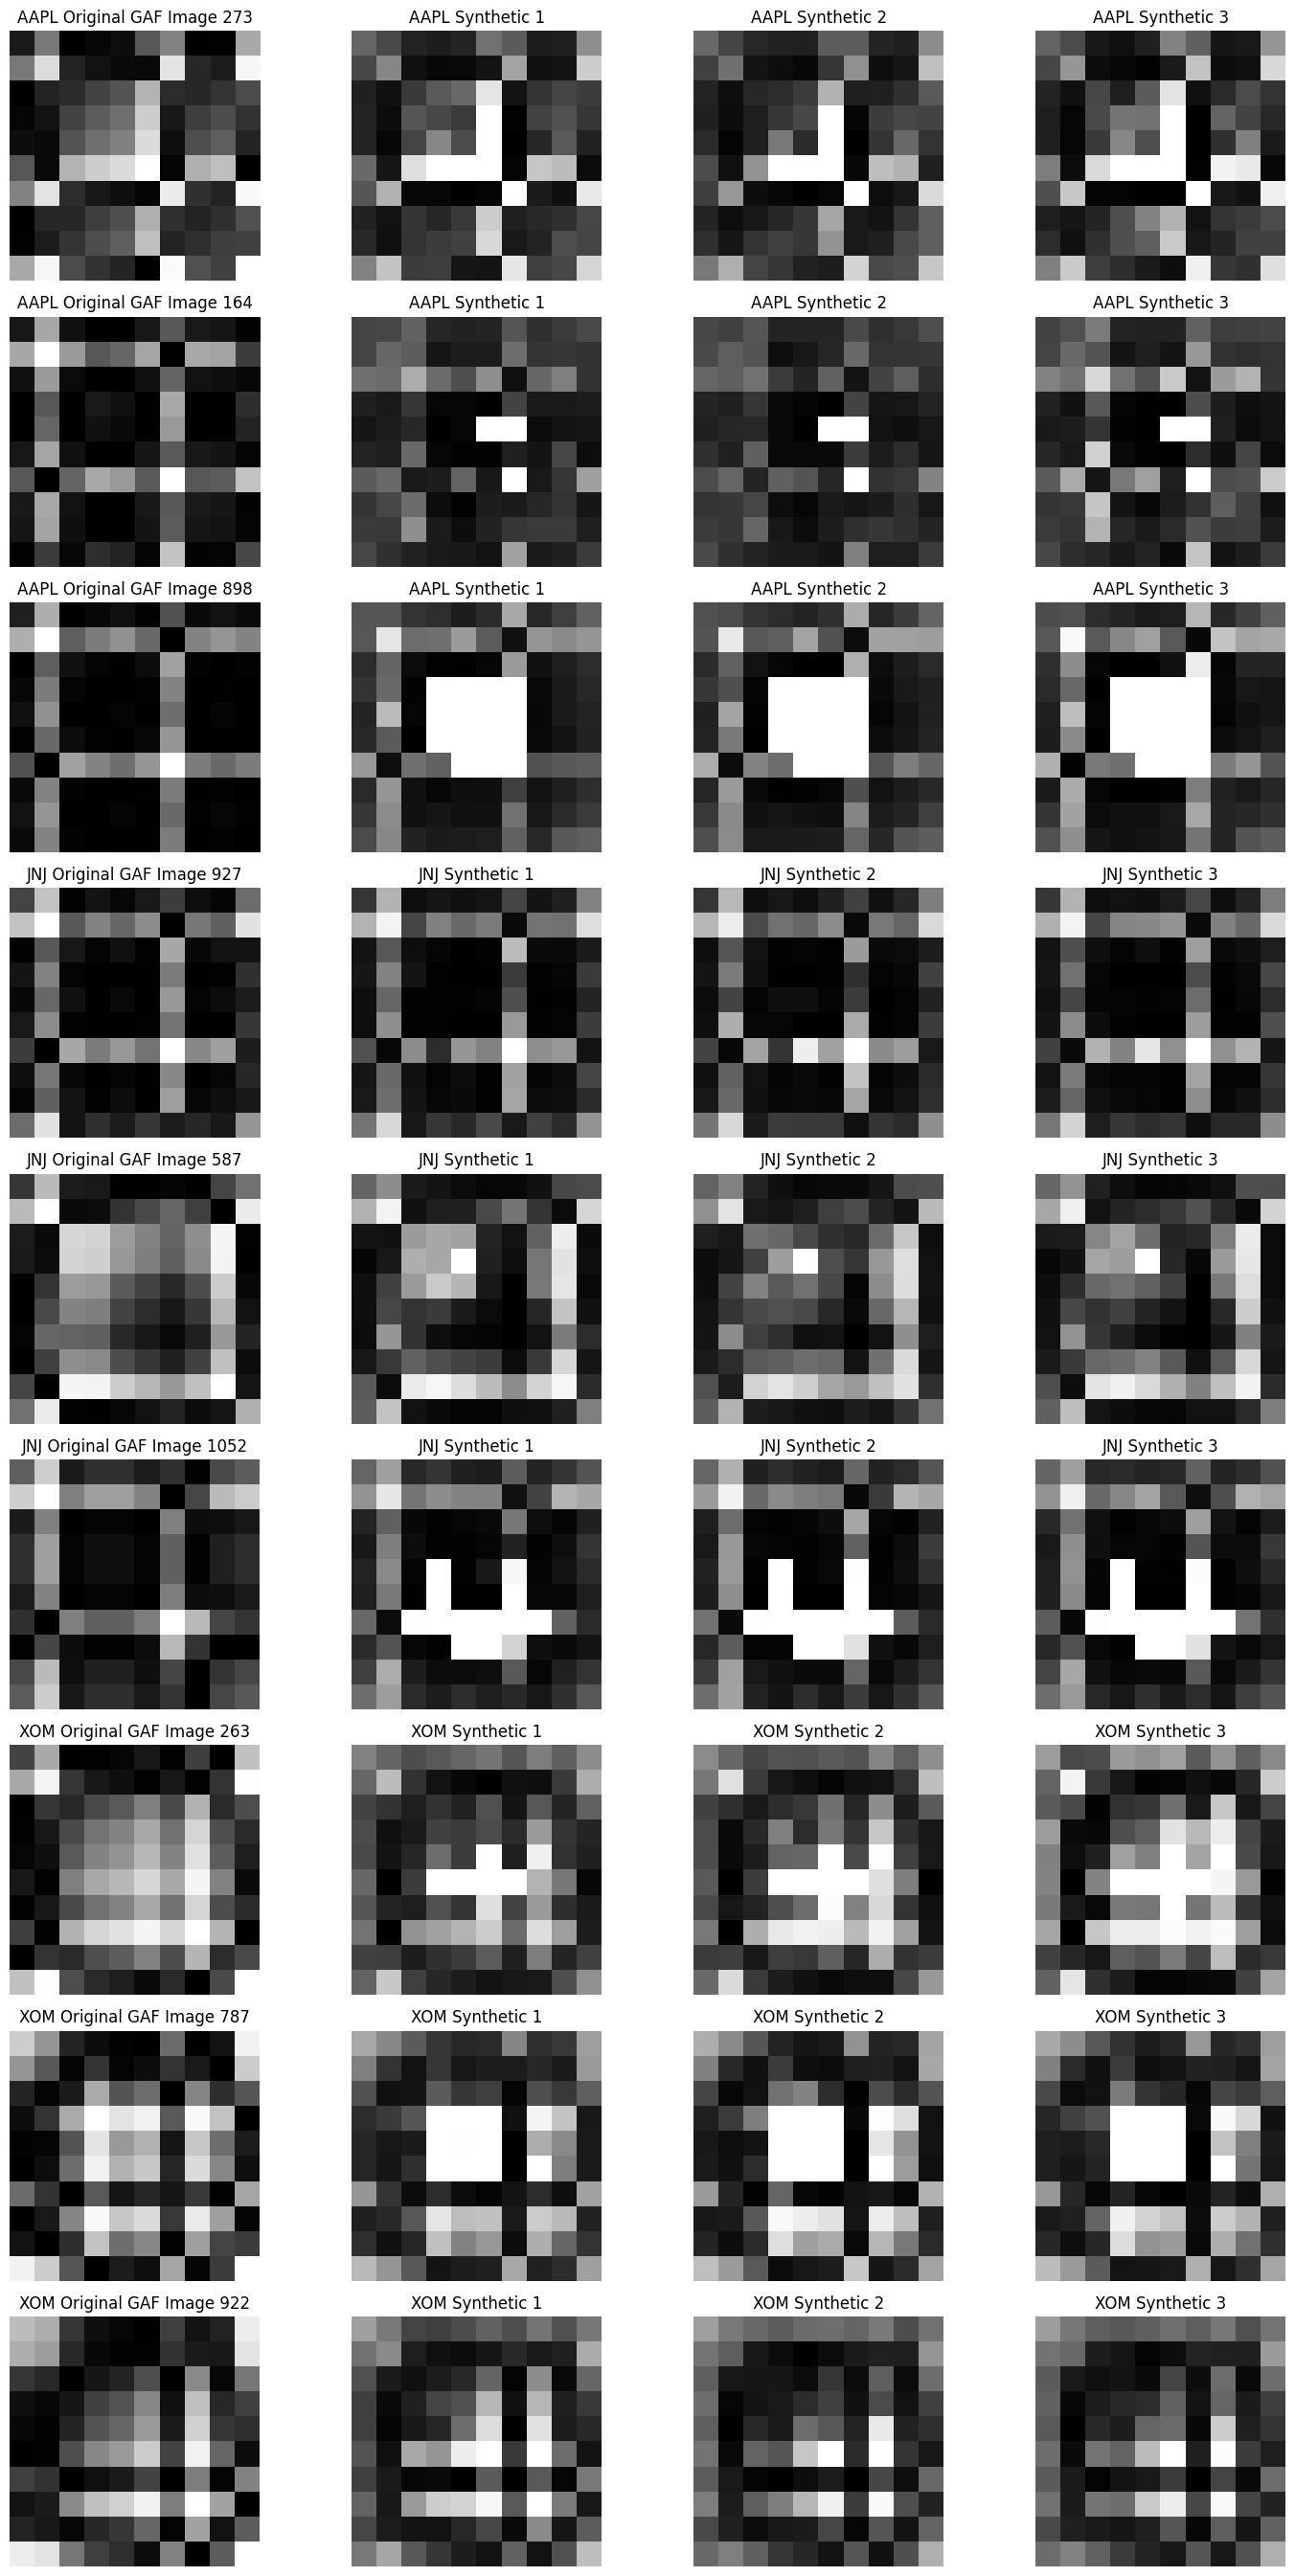

In [24]:
synthetic_data_dict_concat = {}

for asset in tickers:
    # Concatenate synthetic data for the asset
    synthetic_data = synthetic_data_dict[asset]
    synthetic_data_dict_concat[asset] = np.concatenate(synthetic_data, axis=0)
    
    # Print the shape of the concatenated synthetic data
    print(f"Synthetic data shape for {asset}: {synthetic_data_dict_concat[asset].shape}")
    
    # Retrieve original GAF images for training
    gaf_images_train = gaf_data_dict[asset]["gaf_images_train"]

# Plot synthetic data versus original GAF images
plot_synthetic_vs_original(
    gaf_images_dict=gaf_data_dict,
    synthetic_data_dict=synthetic_data_dict_concat,
    assets=tickers,
    num_examples=3,
    num_samples=3
)

In [25]:
window_labels_dict = {}
synthetic_labels_dict = {}

window_size = 7

for asset in tickers:
    # Get the timestamps and the labels for the current asset
    timestamps = data_dict[asset]["X_train"].index.values
    y_train = data_dict[asset]["y_train"]
    
    # Generate window labels
    window_labels = get_window_labels(y_train, timestamps, window_size)
    
    # Print the shape of the window labels
    print(f"Window Labels Shape for {asset}: {window_labels.shape}")  
    
    # Generate synthetic labels
    synthetic_labels = np.repeat(window_labels, 3)
    
    # Print the shape of the synthetic labels
    print(f"Synthetic Labels Shape for {asset}: {synthetic_labels.shape}")
    
    # Store the labels in the dictionaries
    window_labels_dict[asset] = window_labels
    synthetic_labels_dict[asset] = synthetic_labels

Window Labels Shape for AAPL: (1242,)
Synthetic Labels Shape for AAPL: (3726,)
Window Labels Shape for JNJ: (1236,)
Synthetic Labels Shape for JNJ: (3708,)
Window Labels Shape for XOM: (1240,)
Synthetic Labels Shape for XOM: (3720,)


In [26]:
for asset in tickers:
    # Retrieve the necessary data from the dictionaries
    synthetic_data_with_temporal = np.concatenate(synthetic_data_dict[asset], axis=0)
    synthetic_labels = synthetic_labels_dict[asset]
    gaf_images_val = gaf_data_dict[asset]["gaf_images_val"]
    y_val = data_dict[asset]["y_val"]
    
    # Prepare data for tabulation
    data_summary = [
        ['Synthetic X_train', synthetic_data_with_temporal.shape, type(synthetic_data_with_temporal)],
        ['Synthetic y_train', synthetic_labels.shape, type(synthetic_labels)],
        ['X_val', gaf_images_val.shape, type(gaf_images_val)],
        ['y_val', y_val.shape, type(y_val)],
    ]
    
    # Print data neatly using tabulate
    print(f"\nData Summary for {asset}:")
    print(tabulate(data_summary, headers=["Dataset", "Shape", "Type"], tablefmt="grid"))


Data Summary for AAPL:
+-------------------+-------------------+-------------------------------------+
| Dataset           | Shape             | Type                                |
+===================+===================+=====================================+
| Synthetic X_train | (3726, 1, 10, 10) | <class 'numpy.ndarray'>             |
+-------------------+-------------------+-------------------------------------+
| Synthetic y_train | (3726,)           | <class 'numpy.ndarray'>             |
+-------------------+-------------------+-------------------------------------+
| X_val             | (312, 1, 10, 10)  | <class 'numpy.ndarray'>             |
+-------------------+-------------------+-------------------------------------+
| y_val             | (312,)            | <class 'pandas.core.series.Series'> |
+-------------------+-------------------+-------------------------------------+

Data Summary for JNJ:
+-------------------+-------------------+--------------------------------

# LSTM Model

In [28]:
from classifier import *
import torch
from torch.utils.data import DataLoader, TensorDataset

# Initialize dictionaries to store the sequences, tensors, datasets, and loaders
sequence_data_dict = {}
tensor_data_dict = {}
dataset_dict = {}
loader_dict = {}

seq_length = 7

for asset in tickers:
    # Retrieve the necessary data from the dictionaries
    synthetic_data_with_temporal = np.concatenate(synthetic_data_dict_concat[asset], axis=0)
    synthetic_labels = synthetic_labels_dict[asset]
    gaf_images_val = gaf_data_dict[asset]["gaf_images_val"]
    y_val = data_dict[asset]["y_val"]

    # Create sequences
    X_train_seq, y_train_seq = create_sequences(synthetic_data_with_temporal, synthetic_labels, seq_length=seq_length)
    X_val_seq, y_val_seq = create_sequences(gaf_images_val, y_val, seq_length=seq_length)
    
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_seq, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val_seq, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_seq, dtype=torch.long)
    
    # Store the tensors in the dictionary
    tensor_data_dict[asset] = {
        "X_train_tensor": X_train_tensor,
        "y_train_tensor": y_train_tensor,
        "X_val_tensor": X_val_tensor,
        "y_val_tensor": y_val_tensor,
    }
    
    # Create datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    
    # Store the datasets in the dictionary
    dataset_dict[asset] = {
        "train_dataset": train_dataset,
        "val_dataset": val_dataset,
    }
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    
    # Store the loaders in the dictionary
    loader_dict[asset] = {
        "train_loader": train_loader,
        "val_loader": val_loader,
    }

In [29]:
param_grid = { 
    'hidden_size': [64, 128],
    'num_layers': [1, 2, 3],
    'lr': [0.0005, 0.0001, 0.001],
    'num_epochs': [30, 50, 100],
    'dropout': [0.2, 0.3, 0.5]
}

# Initialize a dictionary to store the best parameters for each asset
best_params_dict = {}

for asset in tickers:
    # Perform hyperparameter tuning for each asset
    print(f"Performing hyperparameter tuning for {asset}...")
    best_params = hyperparameter_tuning(loader_dict[asset]['train_loader'], loader_dict[asset]['val_loader'], param_grid, 15, random_state=0)
    
    # Store the best parameters in the dictionary
    best_params_dict[asset] = best_params

    print(f"Best parameters for {asset}: {best_params}")

Performing hyperparameter tuning for AAPL...
Testing parameters: {'num_layers': 1, 'num_epochs': 50, 'lr': 0.0001, 'hidden_size': 64, 'dropout': 0.3}
Validation Accuracy: 0.6176
Testing parameters: {'num_layers': 3, 'num_epochs': 50, 'lr': 0.001, 'hidden_size': 64, 'dropout': 0.5}
Validation Accuracy: 0.3889
Testing parameters: {'num_layers': 2, 'num_epochs': 30, 'lr': 0.0001, 'hidden_size': 128, 'dropout': 0.5}
Validation Accuracy: 0.5621
Testing parameters: {'num_layers': 2, 'num_epochs': 100, 'lr': 0.0005, 'hidden_size': 64, 'dropout': 0.2}
Validation Accuracy: 0.3824
Testing parameters: {'num_layers': 3, 'num_epochs': 100, 'lr': 0.0001, 'hidden_size': 128, 'dropout': 0.2}
Validation Accuracy: 0.6209
Testing parameters: {'num_layers': 3, 'num_epochs': 30, 'lr': 0.001, 'hidden_size': 64, 'dropout': 0.3}
Validation Accuracy: 0.6176
Testing parameters: {'num_layers': 2, 'num_epochs': 100, 'lr': 0.0001, 'hidden_size': 64, 'dropout': 0.5}
Validation Accuracy: 0.5098
Testing parameters: {


Classification Report for AAPL:
               precision    recall  f1-score   support

     Class 0       0.56      0.84      0.67        79
     Class 1       0.52      0.35      0.42        77
     Class 2       0.91      0.83      0.87       150

    accuracy                           0.71       306
   macro avg       0.66      0.67      0.65       306
weighted avg       0.72      0.71      0.70       306


Classification Report for JNJ:
               precision    recall  f1-score   support

     Class 0       0.57      0.27      0.37        86
     Class 1       0.62      0.68      0.65       181
     Class 2       0.34      0.61      0.44        38

    accuracy                           0.55       305
   macro avg       0.51      0.52      0.48       305
weighted avg       0.57      0.55      0.54       305


Classification Report for XOM:
               precision    recall  f1-score   support

     Class 0       0.25      0.03      0.05        70
     Class 1       0.51      

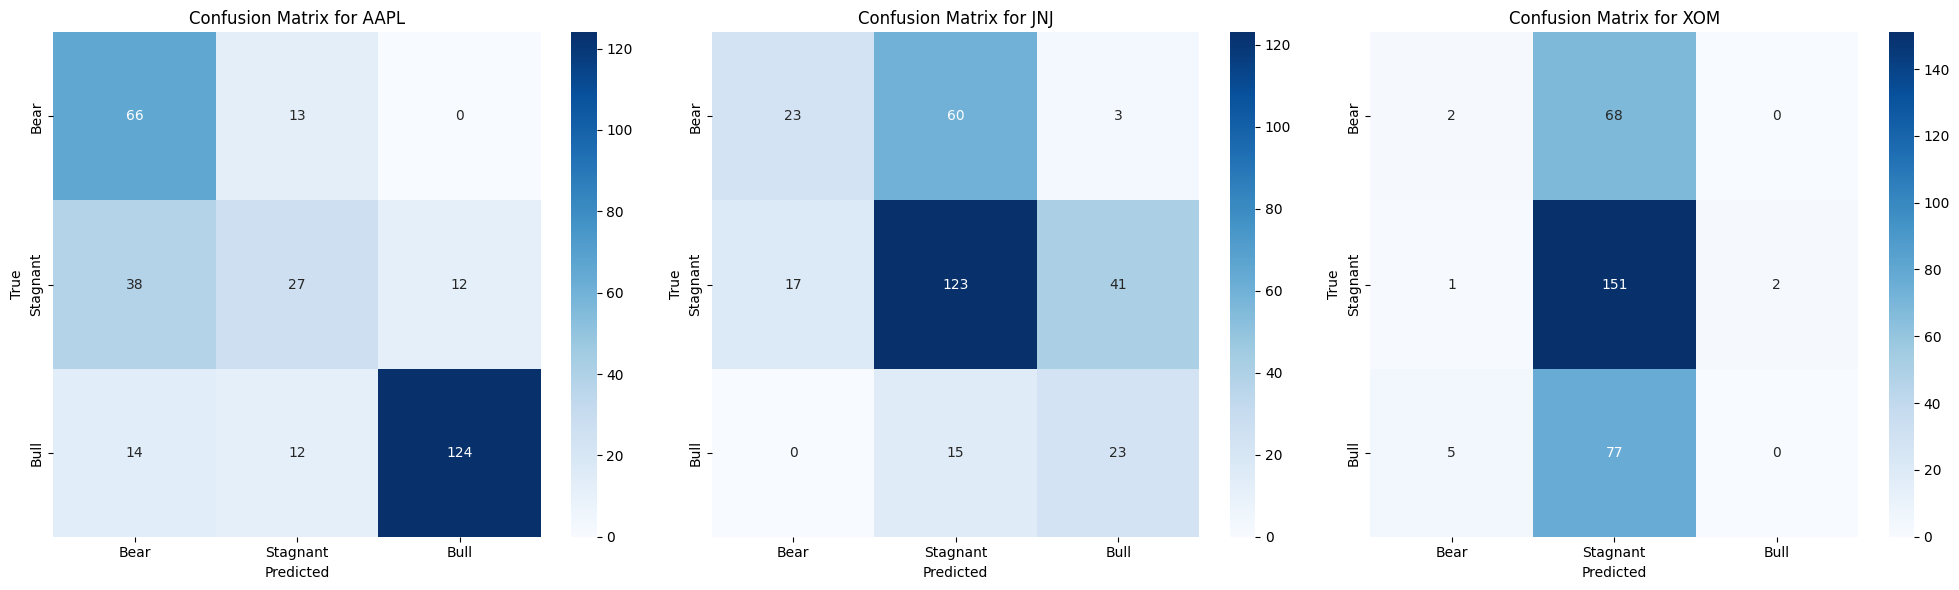

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize dictionaries to store the models, optimizers, and confusion matrices for each asset
model_dict = {}
optimizer_dict = {}
conf_matrix_dict = {}
class_report_dict = {}
y_true_dict = {}
y_pred_dict = {}

for asset in tickers:
    # Get the best hyperparameters for the asset
    best_params = best_params_dict[asset]

    # Initialize the model and optimizer with the best parameters
    best_model = LSTMModel(input_size=100,
                           hidden_size=best_params['hidden_size'],
                           num_layers=best_params['num_layers'],
                           dropout=best_params['dropout'],
                           num_classes=3)
    
    best_optimizer = torch.optim.Adam(best_model.parameters(), lr=best_params['lr'])
    
    # Train the model
    train_model(best_model, loader_dict[asset]['train_loader'], custom_loss, best_optimizer, best_params['num_epochs'])

    # Evaluate the model
    best_model.eval()
    y_pred_dict[asset] = []
    y_true_dict[asset] = []

    with torch.no_grad():
        for sequences, labels in loader_dict[asset]['val_loader']:
            sequences = sequences.view(sequences.size(0), sequences.size(1), -1)
            outputs = best_model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            y_pred_dict[asset].extend(predicted.cpu().numpy())
            y_true_dict[asset].extend(labels.cpu().numpy())

    # Generate the confusion matrix and classification report
    conf_matrix = confusion_matrix(y_true_dict[asset], y_pred_dict[asset])
    class_report = classification_report(y_true_dict[asset], y_pred_dict[asset], target_names=['Class 0', 'Class 1', 'Class 2'])

    # Store the confusion matrix and classification report
    conf_matrix_dict[asset] = conf_matrix
    class_report_dict[asset] = class_report

    # Print the classification report
    print(f"\nClassification Report for {asset}:\n", class_report)

# Plot confusion matrices using subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, asset in enumerate(tickers):
    sns.heatmap(conf_matrix_dict[asset], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bear', 'Stagnant', 'Bull'],
                yticklabels=['Bear', 'Stagnant', 'Bull'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {asset}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

# Backtesting

AAPL Buy and Hold Returns: 27.13%
AAPL Strategy Returns: 19.51%


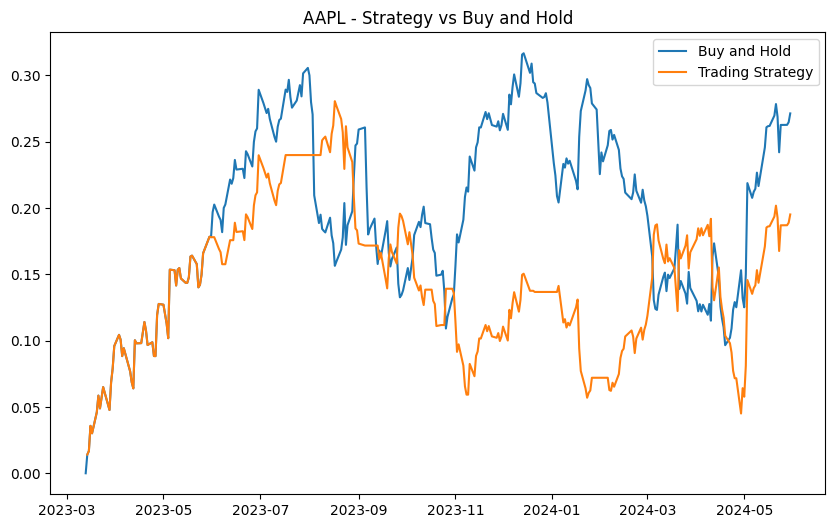

JNJ Buy and Hold Returns: -5.67%
JNJ Strategy Returns: -2.18%


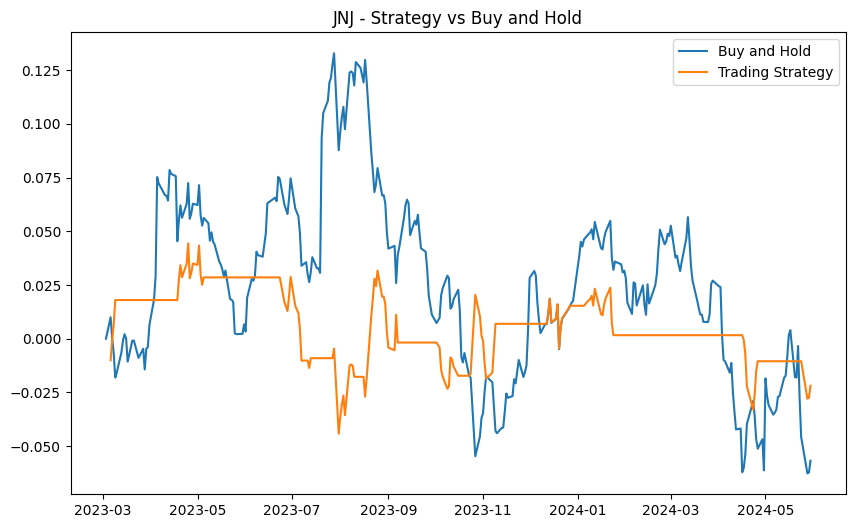

XOM Buy and Hold Returns: 5.76%
XOM Strategy Returns: -3.02%


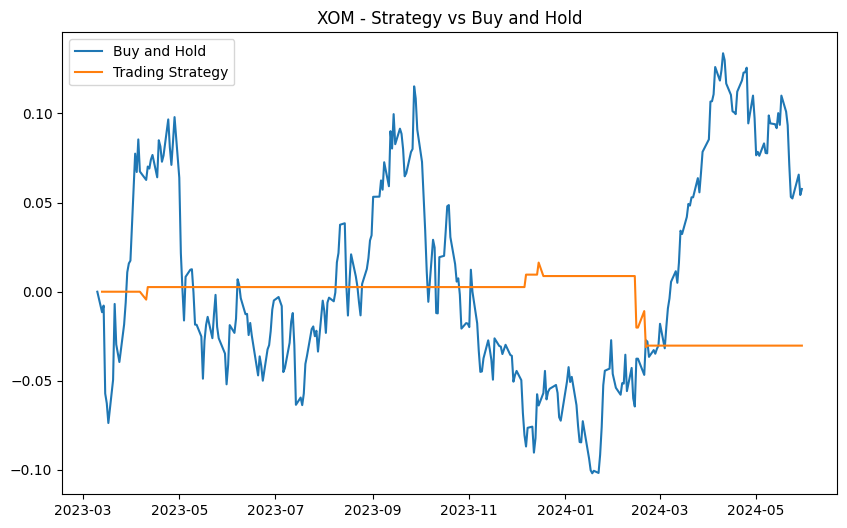

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_returns(prices):
    returns = prices.pct_change().fillna(0)
    cumulative_returns = (1 + returns).cumprod() - 1
    return cumulative_returns

def trading_strategy(predictions, prices):
    strategy_returns = []
    for i in range(1, len(prices)):
        if predictions[i-1] == 2:  # Bull market
            strategy_returns.append(prices[i] / prices[i-1] - 1)
        elif predictions[i-1] == 0:  # Bear market
            strategy_returns.append(-(prices[i] / prices[i-1] - 1))
        else:  # Stagnant market
            strategy_returns.append(0)
    strategy_returns = pd.Series(strategy_returns, index=prices.index[1:])
    cumulative_returns = (1 + strategy_returns).cumprod() - 1
    return cumulative_returns

for asset in ['AAPL', 'JNJ', 'XOM']:
    # Extract predictions and true prices
    predictions = y_pred_dict[asset]
    true_prices = price_data[asset]['close'].loc[data_dict[asset]['y_val'][6:].index]

    # Calculate buy and hold returns
    buy_and_hold = calculate_returns(true_prices)

    # Calculate strategy returns
    strategy = trading_strategy(predictions, true_prices)

    # Print returns
    print(f"{asset} Buy and Hold Returns: {buy_and_hold.iloc[-1]:.2%}")
    print(f"{asset} Strategy Returns: {strategy.iloc[-1]:.2%}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(buy_and_hold, label='Buy and Hold')
    plt.plot(strategy, label='Trading Strategy')
    plt.title(f"{asset} - Strategy vs Buy and Hold")
    plt.legend()
    plt.show()
